In [8]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import plotly.express as px
import numpy as np

# Risk Management

- Annualized Returns and Risk (std. deviation)
- Drawdown/Max Drawdown
- Sharpe Ratios
- Porfolio Returns & VaR

# Annualized Risk & Returns

In [3]:
# Ticker list to download
tickers = 'SPY QQQ TLT AAPL MSFT GOOG AMZN NFLX NVDA MA ADBE'

# Download data from Yahoo-Finance
data = yf.download(
    tickers = tickers,
    period = 'max',
    interval = "1d",
    ignore_tz=True,
    auto_adjust=True, # Adjust all fields by splits and dividends
    #group_by='ticker',
)

df = data['Close'].copy()
df = df.dropna()
df = df["2006-06-01":]
df = df.pct_change()
df = df.fillna(0)
df.index = pd.to_datetime(df.index)
monthly_ret = df.resample('M').agg(lambda x: (1 + x).prod() - 1)

[*********************100%%**********************]  11 of 11 completed


In [4]:
monthly_ret.head()

,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,
2006-06-30,-0.078816,0.057103,0.102937,0.095944,0.010314,0.021034,-0.045598,-0.119520,-0.023752,-0.006894,0.007287
2006-07-31,0.186660,-0.060935,-0.304809,-0.078053,-0.044376,0.032618,-0.239618,0.039925,-0.043075,0.004478,0.021633
2006-08-31,-0.001619,0.137846,0.146523,-0.020874,0.218661,0.072097,-0.032383,0.314815,0.047709,0.021822,0.030561
2006-09-30,0.134562,0.154747,0.041842,0.061739,0.258497,0.064202,0.137862,0.016489,0.046395,0.027001,0.019151
2006-10-31,0.053260,0.021089,0.185866,0.185345,0.054668,0.049726,0.214223,0.178439,0.047479,0.031517,0.008466


In [5]:
annualized_returns = (1 + monthly_ret.mean())**12 - 1
annualized_returns

AAPL    0.359639
ADBE    0.238017
AMZN    0.361305
GOOG    0.203505
MA      0.345248
MSFT    0.221693
NFLX    0.493507
NVDA    0.463666
QQQ     0.163990
SPY     0.105508
TLT     0.042414
dtype: float64

In [9]:
annualied_std_deviation = monthly_ret.std() * np.sqrt(12)
annualied_std_deviation

AAPL    0.310061
ADBE    0.297514
AMZN    0.354228
GOOG    0.274670
MA      0.295866
MSFT    0.229074
NFLX    0.537572
NVDA    0.477861
QQQ     0.187044
SPY     0.155177
TLT     0.139858
dtype: float64

# Sharpe Ratio

Sharpe Ratio $= \frac{R_p - R_f}{\sigma_p}$

- $R_p$ = Porfolio returns
- $R_f$ = Risk Free rate
- $\sigma_p$ = Portfolio volatility

In [11]:
# Calculation of Sharpe ratio assume risk_free_rate = 2%

df_risk_return = pd.DataFrame(
    dict(annualized_returns=annualized_returns,
         annualied_std_deviation=annualied_std_deviation,
        )
)

# Define Risk Free Rate
risk_free_rate = 0.02

# Compute Sharpe Ratio
df_risk_return['sharpe_ratio'] = (df_risk_return['annualized_returns'] - risk_free_rate) / df_risk_return['annualied_std_deviation']


# Sort results by Largest Sharpe ratio
df_risk_return.sort_values("sharpe_ratio", ascending=False)

,annualized_returns,annualied_std_deviation,sharpe_ratio
MA,0.345248,0.295866,1.099308
AAPL,0.359639,0.310061,1.095396
AMZN,0.361305,0.354228,0.963518
NVDA,0.463666,0.477861,0.928441
NFLX,0.493507,0.537572,0.880825
MSFT,0.221693,0.229074,0.880470
QQQ,0.163990,0.187044,0.769821
ADBE,0.238017,0.297514,0.732796
GOOG,0.203505,0.274670,0.668093
SPY,0.105508,0.155177,0.551039


In [12]:
px.scatter(df_risk_return.sharpe_ratio, title = 'Sharpe Ratio for Various Tickers')

# Drawdown & Max-Drawdown

Drawdown $= \frac{C_{pr} - P_p}{P_p}$

- $C_{pr}$ = Cummulative Porfolio returns
- $P_p$ = Previous Peak In Cummalitve Returns

In [13]:
benchmarks = ['SPY', "QQQ", "TLT"]
stocks = ['AAPL', 'ADBE', 'AMZN', 'GOOG', 'MA', 'MSFT', 'NFLX', 'NVDA']

In [14]:
# Cumulative Returns Calculation
ret_cumulative = (1 + monthly_ret).cumprod()

px.line(ret_cumulative, title = 'Cumulative Returns')

In [15]:
previous_peaks = ret_cumulative.cummax()

drawdown = (ret_cumulative - previous_peaks) / previous_peaks

In [17]:
px.line(drawdown[benchmarks], title='Drawdown for SPY, QQQ and TLT')

In [18]:
px.line(drawdown[['SPY', 'NVDA', 'GOOG']], title='Drawdown for SPY, NVDA and GOOG')

In [21]:
# Add max-drawdown to the summary table
df_risk_return["Max Drawdown"] = drawdown.min() * -1
df_risk_return

,annualized_returns,annualied_std_deviation,sharpe_ratio,Max Drawdown
AAPL,0.359639,0.310061,1.095396,0.569114
ADBE,0.238017,0.297514,0.732796,0.651357
AMZN,0.361305,0.354228,0.963518,0.541600
GOOG,0.203505,0.274670,0.668093,0.585629
MA,0.345248,0.295866,1.099308,0.559010
MSFT,0.221693,0.229074,0.880470,0.548613
NFLX,0.493507,0.537572,0.880825,0.798966
NVDA,0.463666,0.477861,0.928441,0.793874
QQQ,0.163990,0.187044,0.769821,0.497398
SPY,0.105508,0.155177,0.551039,0.507848


In [22]:
# Assign new index rather than ticker name for plotting
df_risk_return = df_risk_return.reset_index().rename(columns={"index":"ticker"})
df_risk_return

,ticker,annualized_returns,annualied_std_deviation,sharpe_ratio,Max Drawdown
0,AAPL,0.359639,0.310061,1.095396,0.569114
1,ADBE,0.238017,0.297514,0.732796,0.651357
2,AMZN,0.361305,0.354228,0.963518,0.541600
3,GOOG,0.203505,0.274670,0.668093,0.585629
4,MA,0.345248,0.295866,1.099308,0.559010
5,MSFT,0.221693,0.229074,0.880470,0.548613
6,NFLX,0.493507,0.537572,0.880825,0.798966
7,NVDA,0.463666,0.477861,0.928441,0.793874
8,QQQ,0.163990,0.187044,0.769821,0.497398
9,SPY,0.105508,0.155177,0.551039,0.507848


In [23]:
fig = px.scatter(df_risk_return,
                 x="annualized_returns",
                 y="annualied_std_deviation",
                 text="ticker")

fig.update_traces(textposition='top center')

fig.update_layout(
    xaxis=dict(title='Annualized Returns', tickformat=".0%"),
    yaxis=dict(title='Risk', tickformat=".0%"),
    title_text='Annualized Returns & Risk'
)

fig.show()

# VaR - Value at Risk

In [24]:
import datetime as dt
from scipy.stats import norm

In [25]:
# Create a portfolio, assign weights

tickers = ['AAPL', 'MS','META', 'DIS', 'MA', 'TSLA', 'GME', 'AMZN', 'BA', 'JPM']
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

start = dt.datetime(2019,1,1)
end = dt.datetime.now()

df = yf.download(tickers, start, end)['Adj Close']
df


[*********************100%%**********************]  10 of 10 completed


,AAPL,AMZN,BA,DIS,GME,JPM,MA,META,MS,TSLA
Date,,,,,,,,,,
2019-01-02,37.943260,76.956497,314.645111,107.654335,3.160276,85.334679,184.548187,135.679993,34.618572,20.674667
2019-01-03,34.163830,75.014000,302.100555,105.046211,3.136097,84.121910,176.222382,131.740005,34.001614,20.024000
2019-01-04,35.622250,78.769501,317.822601,108.286606,3.684974,87.223099,184.567566,137.949997,35.389782,21.179333
2019-01-07,35.542969,81.475502,318.823425,109.225136,3.743005,87.283745,185.987656,138.050003,35.741104,22.330667
2019-01-08,36.220520,82.829002,330.891937,110.074760,3.822798,87.119125,187.341949,142.529999,35.518303,22.356667
...,...,...,...,...,...,...,...,...,...,...
2023-10-27,168.220001,127.739998,179.690002,79.330002,13.120000,135.690002,364.079987,296.730011,69.550003,207.300003
2023-10-30,170.289993,132.710007,182.350006,80.680000,12.800000,137.419998,372.420013,302.660004,70.589996,197.360001
2023-10-31,170.770004,133.089996,186.820007,81.589996,13.770000,139.059998,376.350006,301.269989,70.820000,200.839996


In [26]:
returns = df.pct_change()
returns = returns.dropna()

Correlation is just a normalized covariance

In [27]:
import seaborn
# Variance on the diagonal, Covariance between 2 companies elsewehere
# Covariance can be thought as a measure of correlation
cov_matrix = returns.cov()
cov_matrix


,AAPL,AMZN,BA,DIS,GME,JPM,MA,META,MS,TSLA
AAPL,0.000423,0.000286,0.000277,0.000206,0.000316,0.000191,0.000257,0.000339,0.000246,0.000415
AMZN,0.000286,0.000503,0.000204,0.000204,0.000274,0.000128,0.000206,0.000383,0.000181,0.000407
BA,0.000277,0.000204,0.001033,0.000362,0.000485,0.000392,0.000354,0.000283,0.000410,0.000424
DIS,0.000206,0.000204,0.000362,0.000451,0.000251,0.000257,0.000272,0.000248,0.000290,0.000282
GME,0.000316,0.000274,0.000485,0.000251,0.008759,0.000250,0.000179,0.000273,0.000292,0.000690
JPM,0.000191,0.000128,0.000392,0.000257,0.000250,0.000415,0.000253,0.000187,0.000379,0.000231
MA,0.000257,0.000206,0.000354,0.000272,0.000179,0.000253,0.000408,0.000273,0.000290,0.000302
META,0.000339,0.000383,0.000283,0.000248,0.000273,0.000187,0.000273,0.000774,0.000243,0.000405
MS,0.000246,0.000181,0.000410,0.000290,0.000292,0.000379,0.000290,0.000243,0.000501,0.000299
TSLA,0.000415,0.000407,0.000424,0.000282,0.000690,0.000231,0.000302,0.000405,0.000299,0.001695


In [29]:
# Calculate average returns of portfolio
avg_returns = returns.mean()
avg_returns

AAPL    0.001478
AMZN    0.000730
BA      0.000113
DIS     0.000010
GME     0.004929
JPM     0.000618
MA      0.000800
META    0.001069
MS      0.000864
TSLA    0.002785
dtype: float64

Expected Portfolio Return = Average Returns * Weights
- Matrix multiplication (i.e. dot product so we use @)

Expected Portfolio Variance = Transpose(Weights) * Covariance Matrix * Weights
- Hence Standard Deviation = SquareRoot(Variance)

In [30]:
# Expected daily return and volatility of portfolio
# @ symbol used for matrix multiplication
portfolio_mean = avg_returns @ weights
portfolio_std = np.sqrt(weights.T @ cov_matrix @ weights)
print(portfolio_mean, portfolio_std
)


0.0013395627994940917 0.020422836845975782


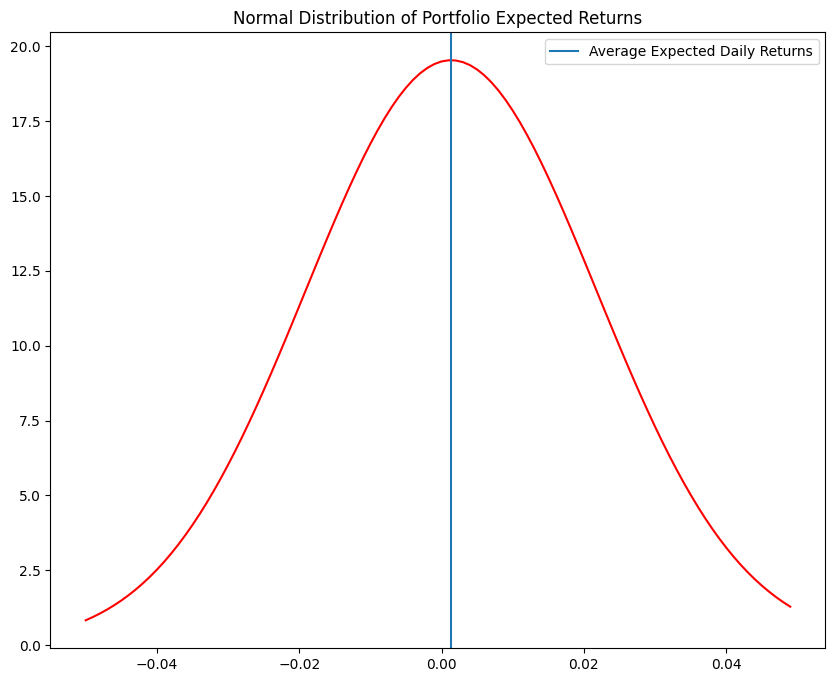

In [31]:
x = np.arange(-0.05,0.05,0.001)
norm_dist = norm.pdf(x, portfolio_mean, portfolio_std)

plt.figure(figsize = (10,8))
plt.plot(x, norm_dist, c='r')
plt.axvline(portfolio_mean, label = 'Average Expected Daily Returns')
plt.title('Normal Distribution of Portfolio Expected Returns')
plt.legend()

In [34]:
# Confidence levels and Value at Risk

# Confidence level is how much data you want to include
# The more data you include the more confident you are your data will not fall below this level

# At 5% confidence level you are including 95% of your data, therefore only 5% of the time the data falls outside this level

# I have 95% confidence that my porfolio will not loose more than X% in one day
confidence_level = 0.05

VaR = norm.ppf(confidence_level, portfolio_mean, portfolio_std)
VaR

print(f'I am 95% confident that my portfolio will not lose more than {round(VaR*100,2)}% in one day')

I am 95% confident that my portfolio will not lose more than -3.23% in one day


Why sqrt of time

In [37]:
# Why times the root
num_days = 500
X_days_VaR = VaR * np.sqrt(num_days)
X_days_VaR

-0.721199328101607

Confidence Interval = $\bar{X} \pm Z * \frac{\sigma}{\sqrt{N}}$

- $\bar{X}$ = Expected Mean Portfolio Returns
- $Z$ = Z-Score
- $\sigma$ = Portfolio Risk/Standard Deviation
- $N$ = Number of trading days


In [40]:
# At a Confidence Level of 99.5% Z-Score = 2, so we calculate our intervals as such

LowerConfidenceInterval = portfolio_mean - 2* portfolio_std
HigherConfidenceInterval =  portfolio_mean + 2* portfolio_std


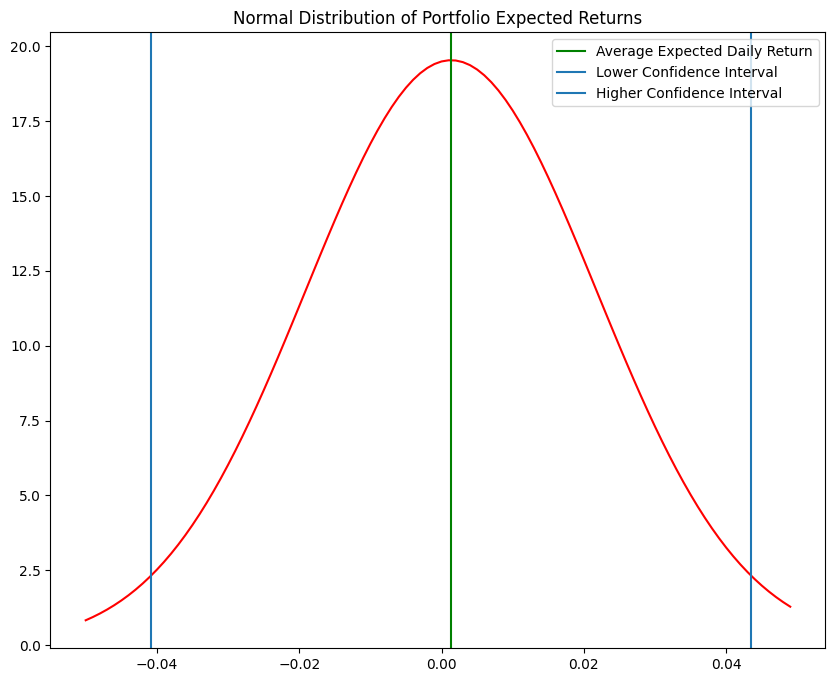

In [41]:
plt.figure(figsize = (10,8))
plt.plot(x, norm_dist, c='r')
plt.axvline(portfolio_mean, label = 'Average Expected Daily Return', c='g')
plt.axvline(LowerConfidenceInterval-portfolio_mean, label = 'Lower Confidence Interval')
plt.axvline(HigherConfidenceInterval+portfolio_mean, label = 'Higher Confidence Interval')
plt.title('Normal Distribution of Portfolio Expected Returns')
plt.legend()